In [217]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
video_game = pd.read_csv("top100videogamesales.csv")
import numpy as np

QUESTION 01: Regional Sales by Publisher: Create a stacked column (or bar) chart to show the sales by region for each publisher in the data. Explain your chart with markdown and detail which publisher had the most sales.

In [218]:
video_game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


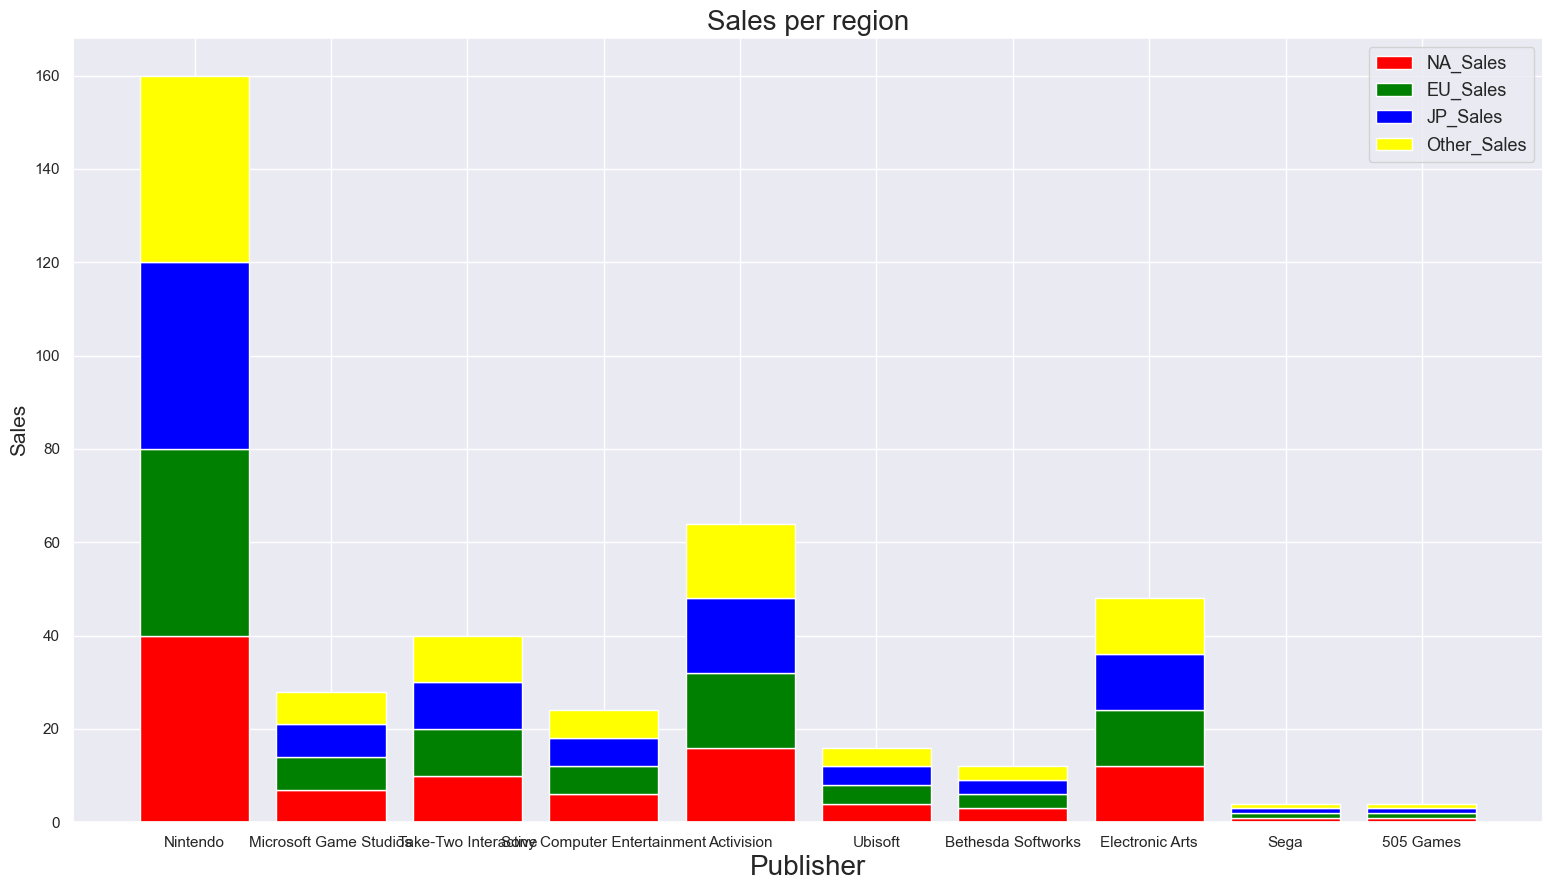

In [311]:
Publishers = np.array(video_game['Publisher'].unique())
Publishers

Nintendo = video_game[video_game['Publisher']=='Nintendo']
len(Nintendo['NA_Sales'])
# I could create a dictionary using lists as values so I have all the information I need to put in the chart.
NA_Sales = []
EU_Sales = []
JP_Sales = []
Other_Sales = []
for p in Publishers:
    ps = video_game[video_game['Publisher'] == p]
    NA_Sales.append(len(ps['NA_Sales']))
    EU_Sales.append(len(ps['NA_Sales']))
    JP_Sales.append(len(ps['NA_Sales']))
    Other_Sales.append(len(ps['NA_Sales']))
labels = []
for p in Publishers:
    labels.append(p)

NA_Sales = np.array(NA_Sales)
EU_Sales = np.array(EU_Sales)
JP_Sales = np.array(JP_Sales)
Other_Sales = np.array(Other_Sales)
labels = np.array(labels)

fig = plt.figure(figsize=(15,8))

plt.bar(labels, NA_Sales, color='red')
plt.bar(labels, EU_Sales, bottom=NA_Sales, color='green')
plt.bar(labels, JP_Sales, bottom=NA_Sales+EU_Sales, color='blue')
plt.bar(labels, Other_Sales, bottom=NA_Sales+EU_Sales+JP_Sales, color='yellow')



plt.xlabel('Publisher', loc='center', fontsize=20)
plt.ylabel('Sales', fontsize=15)
plt.legend(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], fontsize=13)
plt.title("Sales per region", fontsize=20)


plt.show()

QUESTION 02: Global Sales by Year: Create a line chart to show the total global sales for each year.

QUESTION 03: Global Sales